# Task 1 - Data Analysis and Preprocessing
1. Handle Missing Values
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Merge Datasets for Geolocation Analysis
5. Feature Engineering
6. Normalization and Scaling
7. Encode Categorical Features

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import ipaddress
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath(os.path.join('..','src')))
from eda import EDA 
from eda import merge_dataframe

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
# load the datasets
ip = pd.read_csv('../IpAddress_to_Country.csv')
fraud = pd.read_csv('../Fraud_Data.csv')
credit = pd.read_csv('../creditcard.csv')

In [180]:
# get info 
fraud.info()
print('\n')
ip.info()
print('\n')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   low

In [181]:
# merge the two dataframe
merged_df = merge_dataframe(fraud, ip)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         151112 non-null  int64 
 1   signup_time     151112 non-null  object
 2   purchase_time   151112 non-null  object
 3   purchase_value  151112 non-null  int64 
 4   device_id       151112 non-null  object
 5   source          151112 non-null  object
 6   browser         151112 non-null  object
 7   sex             151112 non-null  object
 8   age             151112 non-null  int64 
 9   ip_address      151112 non-null  int64 
 10  class           151112 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 12.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846

In [182]:
%autoreload

# initialize class for exploratory analysis
explore = EDA(merged_df)
df = explore.get_dataframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 129146 non-null  int64  
 1   signup_time             129146 non-null  object 
 2   purchase_time           129146 non-null  object 
 3   purchase_value          129146 non-null  int64  
 4   device_id               129146 non-null  object 
 5   source                  129146 non-null  object 
 6   browser                 129146 non-null  object 
 7   sex                     129146 non-null  object 
 8   age                     129146 non-null  int64  
 9   ip_address              129146 non-null  int64  
 10  class                   129146 non-null  int64  
 11  lower_bound_ip_address  129146 non-null  float64
 12  upper_bound_ip_address  129146 non-null  float64
 13  country                 129146 non-null  object 
dtypes: float64(2), int64(5)

In [183]:
%autoreload

# check null values and duplicates
explore.null_duplicates()

Null values in the dataframe:
user_id                   False
signup_time               False
purchase_time             False
purchase_value            False
device_id                 False
source                    False
browser                   False
sex                       False
age                       False
ip_address                False
class                     False
lower_bound_ip_address    False
upper_bound_ip_address    False
country                   False
dtype: bool


Duplicated values in the dataframe:
False


In [184]:
%autoreload

# change datatypes
explore.change_datatypes()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 129146 non-null  int64         
 1   signup_time             129146 non-null  datetime64[ns]
 2   purchase_time           129146 non-null  datetime64[ns]
 3   purchase_value          129146 non-null  int64         
 4   device_id               129146 non-null  object        
 5   source                  129146 non-null  category      
 6   browser                 129146 non-null  category      
 7   sex                     129146 non-null  category      
 8   age                     129146 non-null  category      
 9   ip_address              129146 non-null  category      
 10  class                   129146 non-null  category      
 11  lower_bound_ip_address  129146 non-null  int64         
 12  upper_bound_ip_address  129146 no

#### Univariate Analysis

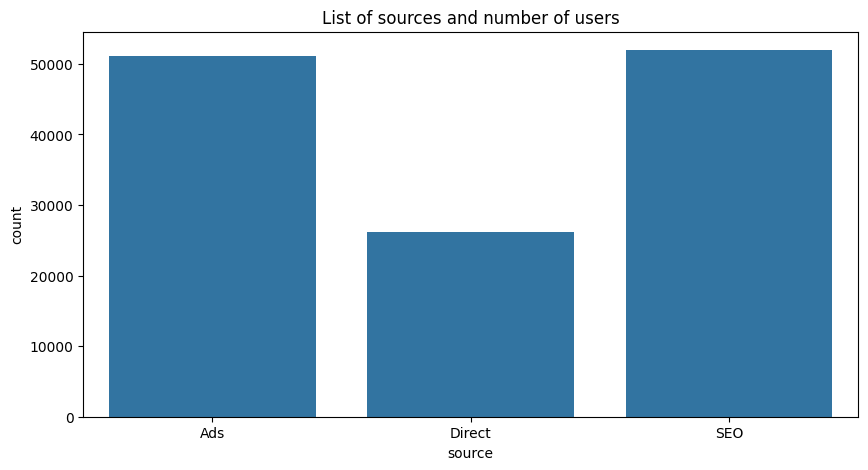

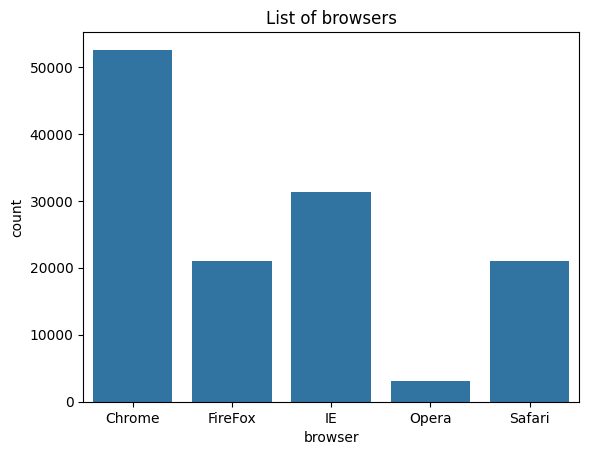

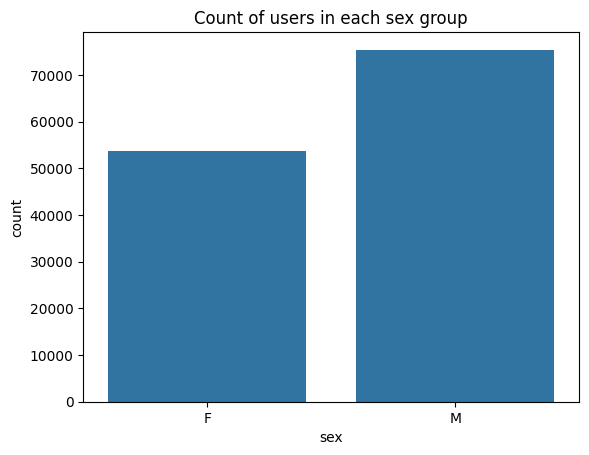

Minimum age in the dataframe: age
71    1
Name: count, dtype: int64
Maximum age in the dataframe: age
31    5687
Name: count, dtype: int64


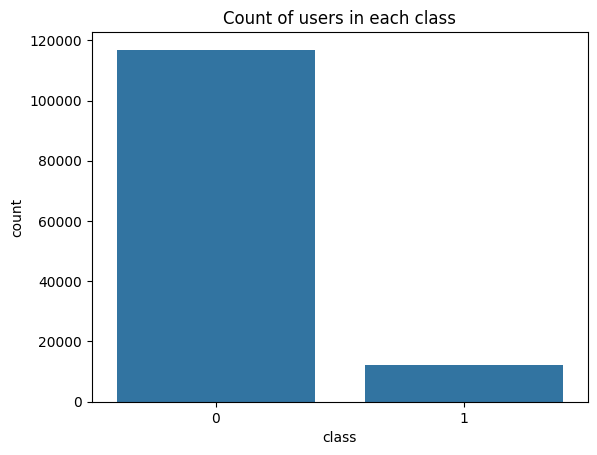

Countries of users
country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
                     ...  
South Sudan              1
Tajikistan               1
Turkmenistan             1
Vanuatu                  1
Yemen                    1
Name: count, Length: 181, dtype: int64


In [185]:
%autoreload

# univariate analysis
explore.univariate_analysis(0)

#### Bivariate Analysis

In [186]:
%autoreload

# sex per class
explore.bivariate_analysis(0)

Number of sex per class
class  sex
0      F      48749
       M      68129
1      F       4956
       M       7312
Name: class, dtype: int64


Number of sex per class
class  sex
0      F      48749
       M      68129
1      F       4956
       M       7312
Name: class, dtype: int64




In [187]:
%autoreload

# countries fraud and non-fraud users 
explore.bivariate_analysis(1)

Top 10 Countries with most non-fraud users
                       0        1
United States      90.44  58049.0
China              91.34  12038.0
Japan              90.21   7306.0
United Kingdom     89.38   4490.0
Korea Republic of  90.87   4162.0
Germany            92.81   3646.0
France             90.51   3161.0
Canada             88.30   2975.0
Brazil             90.88   2961.0
Italy              91.46   1944.0


Top 10 Countries with most fraud users
                            0      1
Turkmenistan           100.00    1.0
Namibia                 43.48   23.0
Sri Lanka               41.94   31.0
Luxembourg              38.89   72.0
Virgin Islands (U.S.)   33.33    3.0
Ecuador                 26.42  106.0
Tunisia                 26.27  118.0
Peru                    26.05  119.0
Bolivia                 24.53   53.0
Kuwait                  23.33   90.0


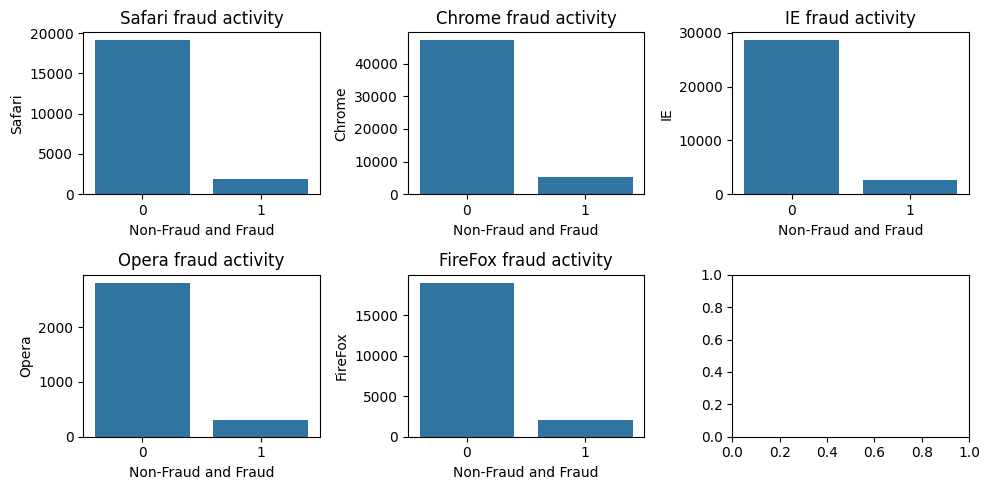

In [188]:
%autoreload

# browsers fraud and non-fraud activity 
explore.bivariate_analysis(2)

#### Feature Engineering


In [189]:
%autoreload

# Time-Based features
explore.feature_eng(0)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,lower_bound_ip_address,upper_bound_ip_address,country,signup_time_month,signup_time_day_of_week,signup_time_hour,purchase_time_month,purchase_time_day_of_week,purchase_time_hour,time_of_day
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,...,16778240,16779263,Australia,June,Sunday,3,August,Sunday,3,Midnight
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,...,16809984,16842751,Thailand,January,Wednesday,14,February,Wednesday,20,Evening
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,...,16843264,16843775,China,March,Thursday,20,April,Saturday,23,Night
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,...,16924672,16941055,China,February,Tuesday,6,May,Saturday,16,Noon
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,...,16941056,16973823,Thailand,July,Tuesday,12,November,Tuesday,4,Midnight


##### Analysis of Time features

##### Univariate Analysis

Monthly signup and purchase activity


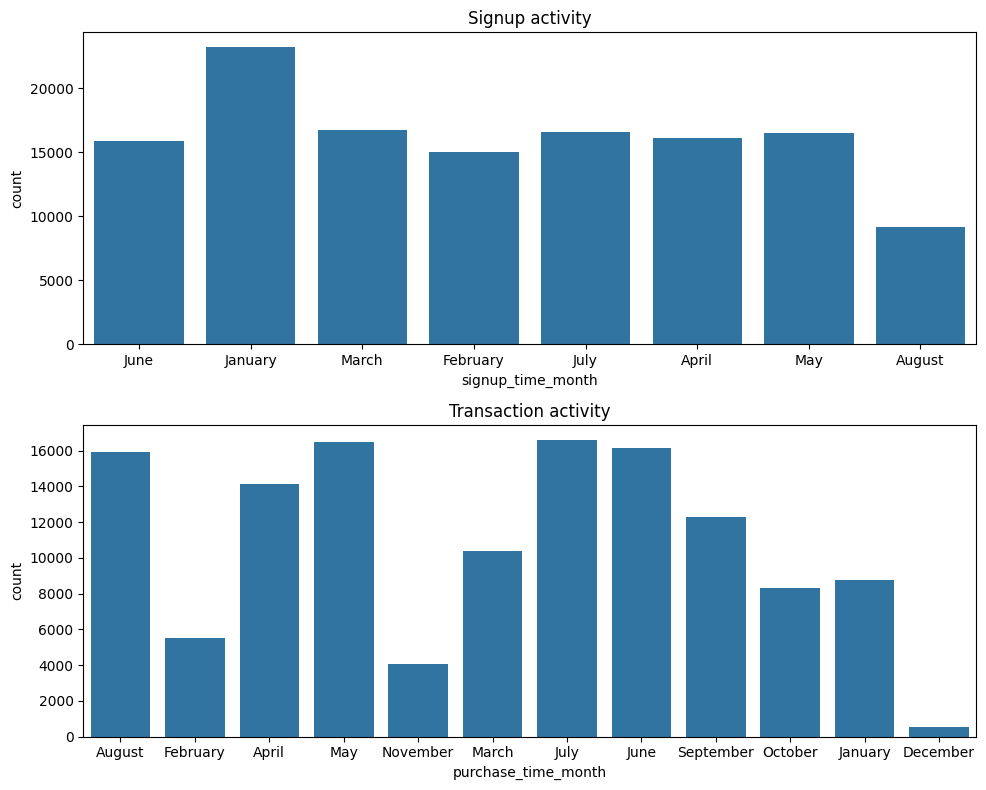

In [190]:
%autoreload

#  monthly activities
explore.univariate_analysis(1)

Day of the week signup and purchase activity


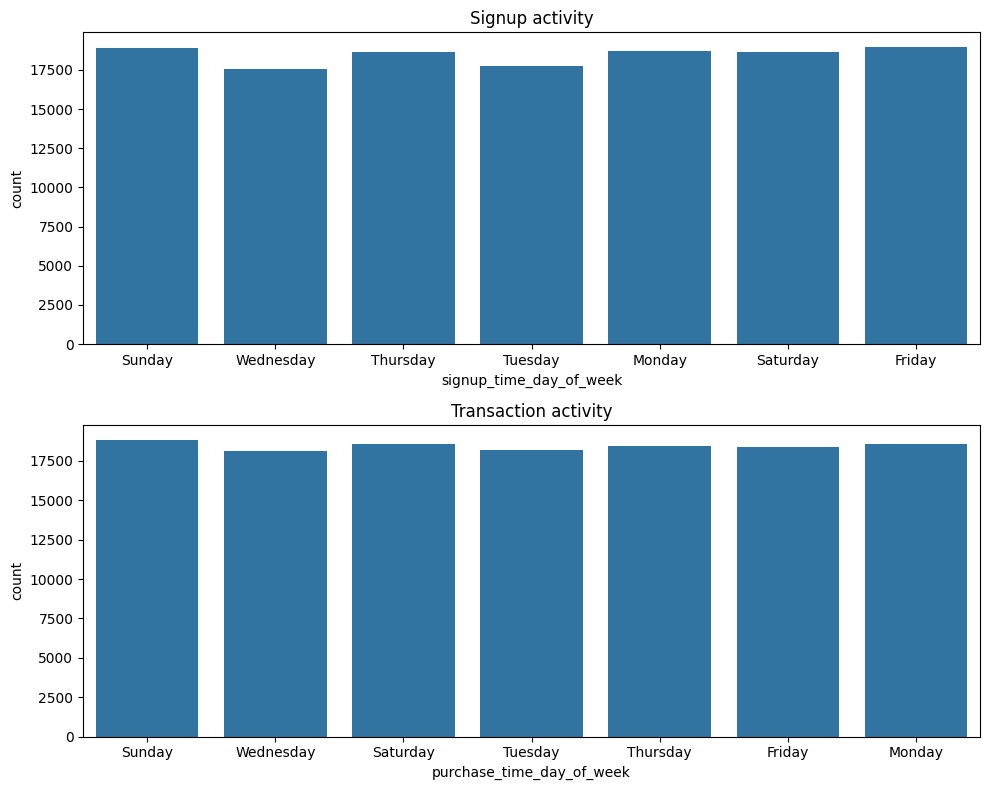

In [191]:
%autoreload

#  day activities
explore.univariate_analysis(2)

Time of the day signup and purchase activity


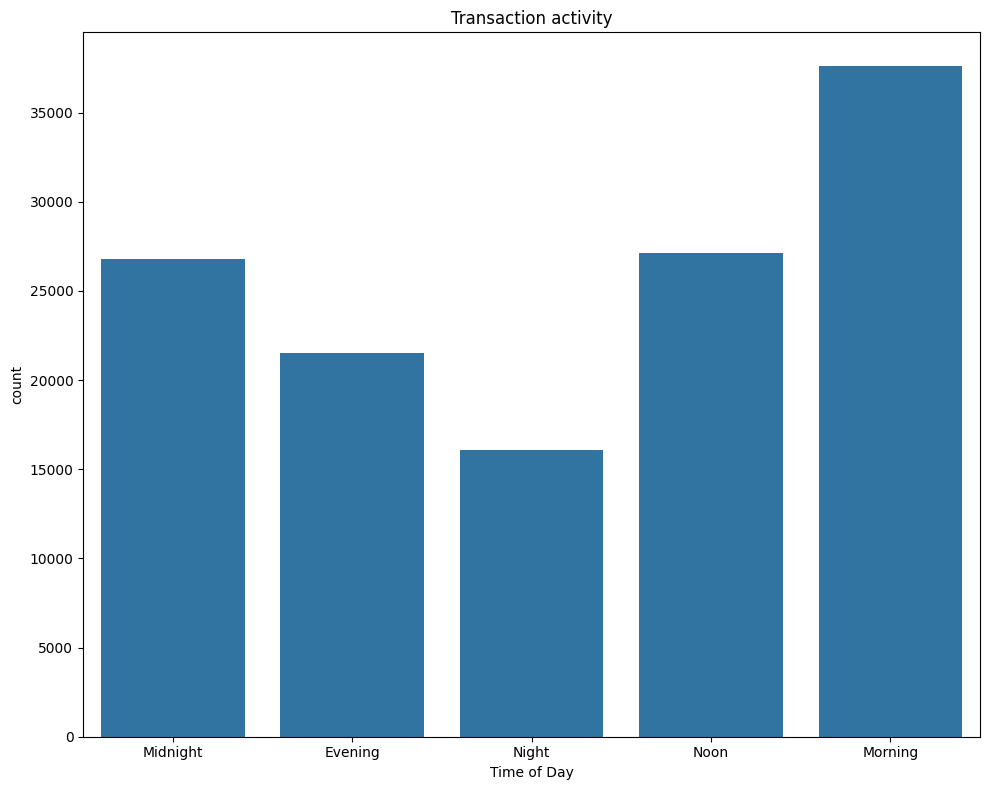

In [192]:
%autoreload

#  day activities
explore.univariate_analysis(3)

##### Bivariate Analysis

Which days does most fraud happens


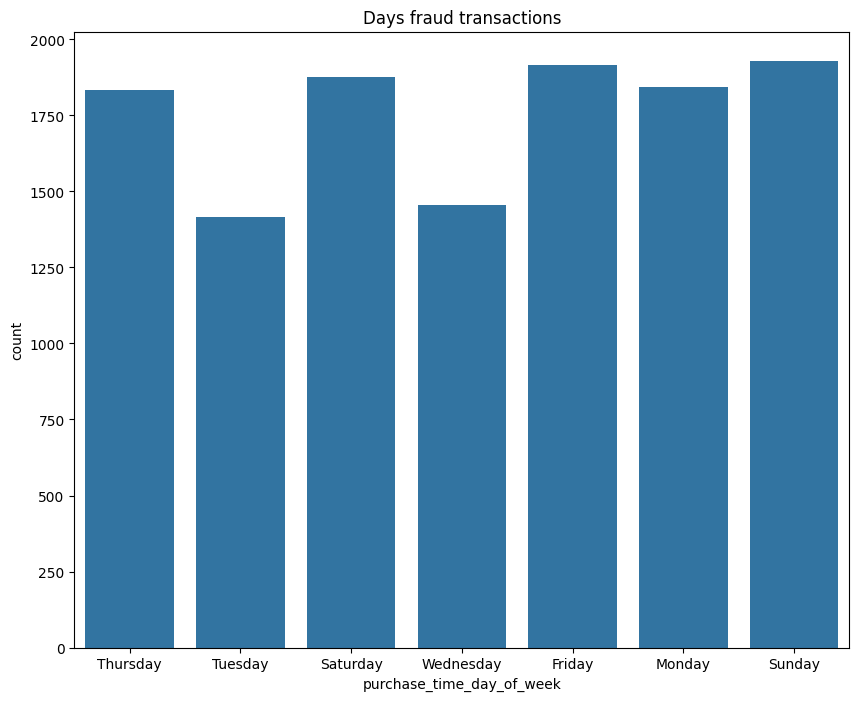

Which time of the day does most fraud happens


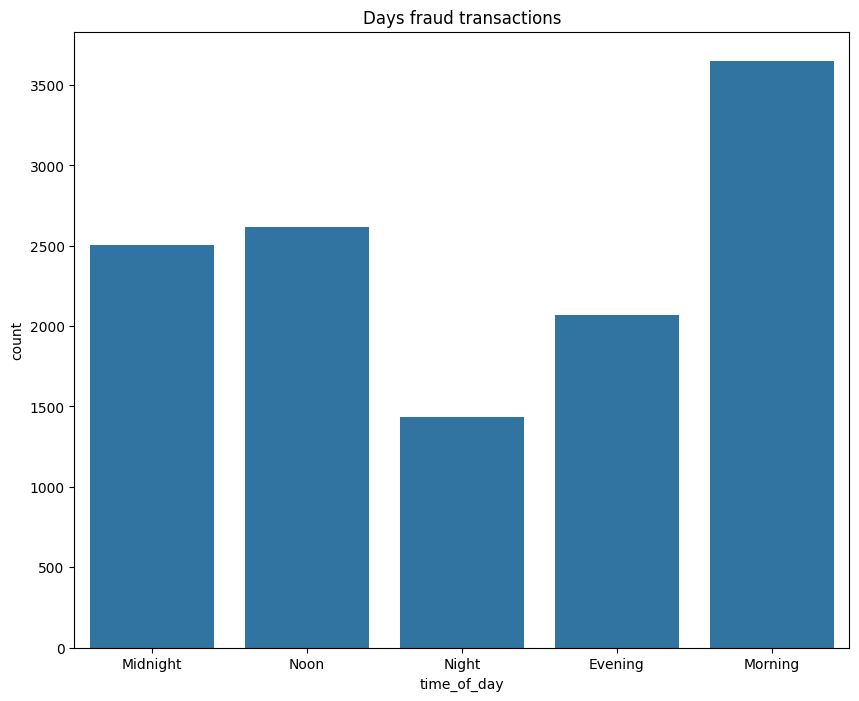

In [193]:
%autoreload

# days fraud activity 
explore.bivariate_analysis(3)

In [200]:
%autoreload

# encode categorical features
explore.encode()

### Working on the creditcard dataset

#### Change datatype

In [197]:
%autoreload

# initialize class for exploratory analysis
explore = EDA(credit)


# change datatype of Class to category
explore.change_datatypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  float64 
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

#### Scaling

In [198]:
%autoreload

# scaling the Amount feature
explore.change_datatypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  float64 
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

In [201]:
%autoreload

# encode categorical features
explore.encode()


In [196]:
# close logging
explore.close_log()